This document will take the transcripts from the Parsing Standup document, clean them up a bit and give some descriptive stats on the data. 

In [1]:
import pandas as pd
from pandas import DataFrame
from collections import Counter
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sw = stopwords.words('english')
from string import punctuation
import numpy as np
import re


This cell reads in the dataframe from the first python script so we can manipulate the data further. 

In [2]:
df = pd.read_csv("DF_TO_LOAD.csv")
df.head()


,title,link,CSV,year
0,Hasan Minhaj Homecoming King,https://scrapsfromtheloft.com/comedy/hasan-min...,hasan-minhaj-homecoming-king-transcript.txt,NaN
1,Aziz Ansari Live In Madison Square Garden 2015...,https://scrapsfromtheloft.com/comedy/aziz-ansa...,aziz-ansari-live-in-madison-square-garden-2015...,2015.0
2,Bert Kreischer Fighting A Bear,https://scrapsfromtheloft.com/comedy/bert-krei...,bert-kreischer-fighting-a-bear-transcript.txt,NaN
3,Kevin Bridges Story So Far Live Glasgow,https://scrapsfromtheloft.com/comedy/kevin-bri...,kevin-bridges-story-so-far-live-glasgow-transc...,NaN
4,Tom Segura Disgraceful 2018,https://scrapsfromtheloft.com/comedy/tom-segur...,tom-segura-disgraceful-2018-full-transcript.txt,2018.0


This cell takes the csv column from the dataframe and then breaks it down to tokens so we can get descriptive statistics on the transcripts. 

In [10]:
# data = []
tot_tok = []
unq_tok = []
avg_len = []
lex_div = []
tten = []
words = []
transcripts = []
    
for item in df["CSV"]:
    with open (item, "r", encoding="UTF-8") as infile:
        corpus = infile.readlines()

    total_tokens = 0
    unique_tokens = 0
    token_len = 0
    avg_token_len = 0
    lex_diversity = 0

    corpora = " ".join([ch for ch in corpus if ch not in punctuation])
    transcripts.append(corpora) #use this for lang detect, we will remove later
    includedTokens = [w for w in corpora.split()]
    fold = [w.lower() for w in includedTokens if w.isalpha() and (len(w)>1 or w=="I")]
    fold  = [w for w in fold if w not in sw]
    
# Get the descriptive stats
    total_tokens = len(fold)

    unique_tokens = len(set(fold))

    token_len = [len(w) for w in fold]
    avg_token_len = np.mean(token_len)

    lex_diversity = len(set(fold))/len(fold)

    fdtxt = FreqDist(fold)
    fdtxt = fdtxt.most_common(10)

    strtext = "".join([str(elem)for elem in fdtxt])
    top_10 = strtext

    tot_tok.append(total_tokens)
    unq_tok.append(unique_tokens)
    avg_len.append(avg_token_len)
    lex_div.append(lex_diversity)
    tten.append(top_10)
    words.append(fold)

Now we take the lists that we created and add it to our dataframe so we can produce an output csv file.

In [12]:
df["Total_Tokens"] = tot_tok
df["Unique_Tokens"] = unq_tok
df["Avg_Token_Length"] = avg_len
df["Lex_Diversity"] = lex_div
df["Most_Frequent_Words"] = tten
df["Words"] = words
df["Transcripts"] = transcripts



In [13]:
from langdetect import detect

# Dectect language based on the first 500 characters and create a language column in the df
df['language'] = df.Transcripts.apply(lambda x: detect(x[:500]))

print(df.language.value_counts())
df.head()
#we want to get rid of any non-english specials as it doesn't help any analysis that we will be doing.
df = df.drop(df.index[df['language']!= "en"])    
del df["Transcripts"]

en    341
Name: language, dtype: int64


In [ ]:
df.head(4)

In [14]:
df.to_csv("DataSetShare.csv", index = False)

In [ ]:
df

Just messing around down here, can ignore, but may be interesting.


Katt Williams Live 2006     


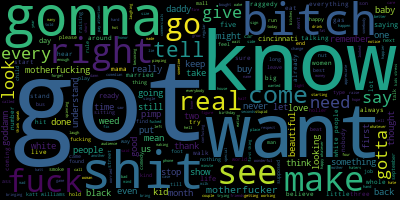

In [15]:
from wordcloud import WordCloud

print(df.title[220])
wordcloud = WordCloud(background_color="Black", max_words=5000, contour_width=3, contour_color='midnightblue')
wordcloud.generate(' '.join(df.Words[220]))
wordcloud.to_image()
